# Harris Corner Detection

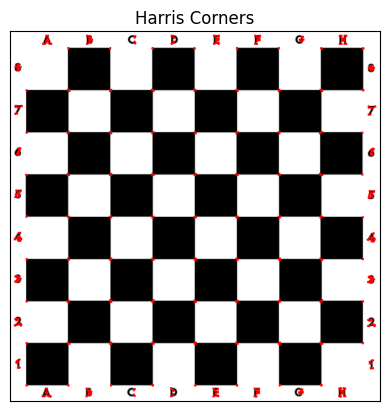

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('chess.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray) # Harris expects the input image to be float32.

harris = cv2.cornerHarris(gray, 2, 3, 0.04)

harris = cv2.dilate(harris, None) # makes markers more visible and thicker(optional)

                                                # neglect small harris values
img[harris > 0.01 * harris.max()] = [0, 0, 255] # extract harris from img and
                                                # mark the corners in red

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Harris Corners'), plt.xticks([]), plt.yticks([])
plt.show()


# Shi-Tomas Corner Detector

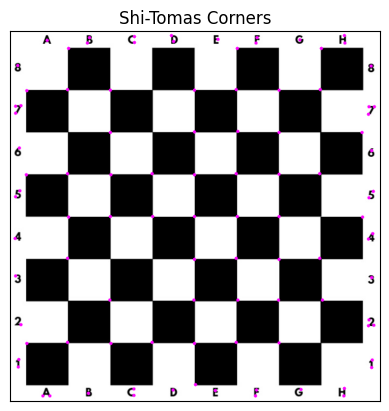

In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('chess.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10)  # returns all detected points in the image in form of coordinates(x,y)
                                                       # These are floating-point coordinates (float32).
corners = np.int32(corners)                   # Convert floats → integers for further processing
 
for i in corners:
    x, y = i.ravel()        # flattens the array and extract x,y coordinates
    cv2.circle(img, (x, y), 3, (255, 0, 255), -1)  # draw a circle at each corner with extracted x,y, radius,color,thickness=-1(filled circle)

                                         
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Shi-Tomas Corners'), plt.xticks([]), plt.yticks([])
plt.show()


# SIFT (Scale-Invariant Feature Transform)

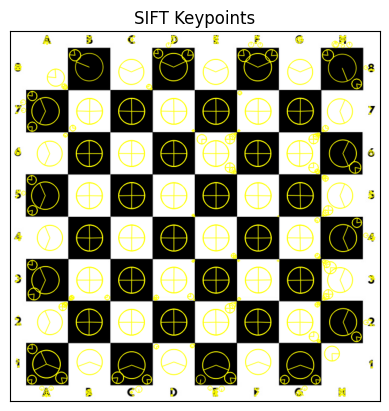

In [20]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('chess.jpg')

gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray,None)
both = cv.drawKeypoints(gray,kp,img,(0,255,255),flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) 

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('SIFT Keypoints'), plt.xticks([]), plt.yticks([])
plt.show()




# FAST (Features from Accelerated Segment Test)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 495
Total Keypoints without nonmaxSuppression: 4689


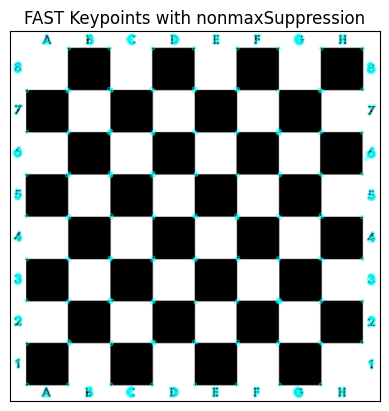

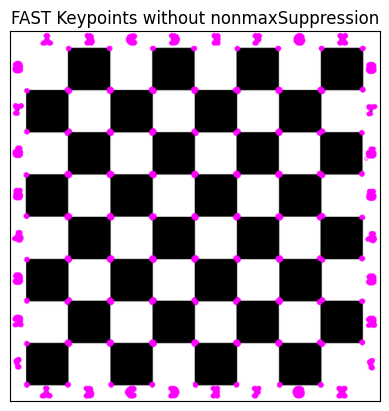

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('chess.jpg', cv.IMREAD_GRAYSCALE) 

# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,255,0))

# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )


# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)

print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )

img3 = cv.drawKeypoints(img, kp, None, color=(255,0,255))

plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title('FAST Keypoints with nonmaxSuppression'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.title('FAST Keypoints without nonmaxSuppression'), plt.xticks([]), plt.yticks([])
plt.show()

# ORB 

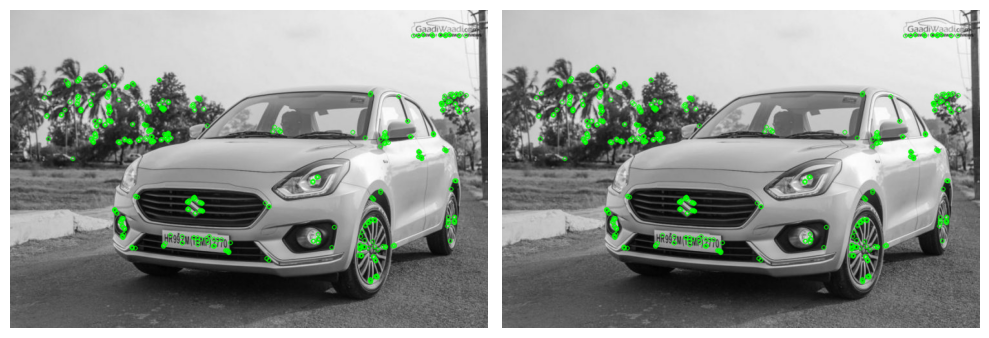

In [30]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('image.jpg', cv.IMREAD_GRAYSCALE)
img3 = img.copy()
# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints with ORB
kp = orb.detect(img,None)

# compute the descriptors with ORB

kp, des = orb.compute(img, kp)

kp , des = orb.detectAndCompute(img3, None)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
img3 = cv.drawKeypoints(img3, kp, None, color=(0,255,0), flags=0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1),plt.imshow(img2), plt.axis('off')
plt.subplot(1,2,2),plt.imshow(img3), plt.axis('off')
plt.tight_layout()